#物体検知ウェイトの学習

## darknet構築

In [0]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.16 MiB | 257.00 KiB/s, done.
Resolving deltas: 100% (3922/3922), done.


In [0]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!make

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:947:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/utils.

In [0]:
!sed -i 's/i%10000==0/i%1000==0/g' /content/darknet/examples/detector.c

## google driveのマウント

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp /content/gdrive/My\ Drive/Python3/fujifilm/data/images.zip data/
!cp /content/gdrive/My\ Drive/Python3/fujifilm/data/labels.zip data/
%cd data
!unzip images.zip
!unzip labels.zip
%cd ..

/content/darknet/data
Archive:  images.zip
   creating: images/
  inflating: images/process.py       
  inflating: images/train_id0003_no0031.jpg  
  inflating: images/train_id0003_no0032.jpg  
  inflating: images/train_id0003_no0033.jpg  
  inflating: images/train_id0003_no0034.jpg  
  inflating: images/train_id0003_no0035.jpg  
  inflating: images/train_id0003_no0036.jpg  
  inflating: images/train_id0003_no0037.jpg  
  inflating: images/train_id0003_no0038.jpg  
  inflating: images/train_id0003_no0046.jpg  
  inflating: images/train_id0003_no0047.jpg  
  inflating: images/train_id0003_no0048.jpg  
  inflating: images/train_id0003_no0049.jpg  
  inflating: images/train_id0003_no0050.jpg  
  inflating: images/train_id0003_no0051.jpg  
  inflating: images/train_id0003_no0052.jpg  
  inflating: images/train_id0003_no0062.jpg  
  inflating: images/train_id0003_no0063.jpg  
  inflating: images/train_id0003_no0064.jpg  
  inflating: images/train_id0003_no0065.jpg  
  inflating: images/trai

In [0]:
!scp -r /content/gdrive/My\ Drive/Python3/fujifilm/data/weights/ backup/
!cp /content/gdrive/My\ Drive/Python3/fujifilm/data/myvocv2.data cfg/
!cp /content/gdrive/My\ Drive/Python3/fujifilm/data/myyolov2-voc.cfg cfg/
!cp /content/gdrive/My\ Drive/Python3/fujifilm/data/obj.names data/images/
!cp /content/gdrive/My\ Drive/Python3/fujifilm/data/names.list data/
!cp /content/gdrive/My\ Drive/Python3/fujifilm/data/train.txt data/images
!cp /content/gdrive/My\ Drive/Python3/fujifilm/data/test.txt data/images

In [0]:
# !cat /content/darknet/examples/detector.c

# weightの学習

In [0]:
!./darknet detector train cfg/myvocv2.data cfg/myyolov2-voc.cfg
# !./darknet detector train cfg/myvocv2.data cfg/myyolov2-voc.cfg backup/weights/myyolov2-voc.backup

myyolov2-voc
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  32   ->   208 x 208 x  32
    2 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    4 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    5 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    6 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    7 max          2 x 2 / 2   104 x 104 x 128   ->    52 x  52 x 128
    8 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
    9 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128  0.177 BFLOPs
   10 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
   11 max          2 x 2 / 2    52 x  

# weightの確認

In [0]:
def display_image(file_path = './predictions.jpg'):
    import cv2
    import matplotlib.pyplot as plt
    import os.path

    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off")
    ax.tick_params(labelleft="off",left="off")
    ax.set_xticklabels([]) 
    ax.axis('off')

    if os.path.exists(file_path):
      img = cv2.imread(file_path)
      show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.imshow(show_img)

In [0]:
!./darknet detector test cfg/myvocv2.data cfg/myyolov2-voc.cfg backup/weights/myyolov2-voc.backup data/images/train_id0003_no0031.jpg -thresh 0.05

names: Using default 'data/names.list'
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  32   ->   208 x 208 x  32
    2 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    4 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    5 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    6 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    7 max          2 x 2 / 2   104 x 104 x 128   ->    52 x  52 x 128
    8 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
    9 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128  0.177 BFLOPs
   10 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
   11 max   

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


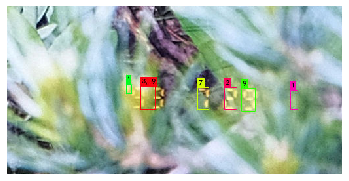

In [0]:
display_image()